# Quarks Flavour Violation Higgs decays in 2HDM with a seesaw type I

In this model the couplings that allows LFVHD are given by 

| Vertex|coupling&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|Vertex|coupling&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
|-------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------|
|$g_{\phi W^+ W^-}$|$ig m_W \Xi_\phi$|$g_{\phi G^+ G^-}$|$-i \frac{g m_\phi^2 \Xi_\phi}{2 m_W}$|
|$g_{\phi G^+ W^-}$|$i \frac{g \Xi_\phi}{2}(p_+ - p_0)_\mu$|$g_{\phi W^+ G^-}$|$i \frac{g \Xi_\phi}{2}(p_0 - p_-)_\mu$|
|$g_{\phi H^+ W^-}$|$i \frac{g \eta_\phi}{2}(k_+ - p_0)_\mu$|$g_{\phi W^+ H^-}$|$i \frac{g \eta_\phi}{2}(p_0 - k_-)_\mu$|
| $g_{\phi H^{\pm}G^{\mp}}$|$i \frac{g \eta_\phi(m_{H^{\pm}}^2 - m_\phi^2)}{2 m_W}$|$g_{\phi H^{\pm}H^{\mp}}$| $ig \frac{\rho_\phi g_\phi - \Delta_\phi \mathcal{G}_\phi}{4 m_W \sin{2 \beta}} + i \frac{4 \lambda_5  m_W \rho_\phi}{g \sin{2 \beta}}$|
|$g_{\phi d \overline{d}}$|$-ig \xi_\phi^{d}\frac{m_d}{2 m_W}$|$g_{\phi u \overline{u}}$|$-ig \xi_\phi^{u}\frac{m_u}{2 m_W}$|
|$\bar{u}_{i}d_{a} W_{\mu}^{+}$|$\frac{i g}{\sqrt{2}} U_{a i}^{\nu} \gamma^{\mu}P_{L}$|$\overline{d_{a}}u_{j}W_{\mu}^{-}$|$\frac{i g}{\sqrt{2}} U_{a j}^{\nu *}\gamma^{\mu} P_{L}$|
|$\bar{u}_{i} d_{a} G_{W}^{+}$|$-\frac{i g}{\sqrt{2} m_{W}} U_{a i}^{\nu}\left(m_{d_{a}}P_{R}-m_{u, i} P_{L}\right)$|$\overline{d_{a}} u_{j} G_{W}^{-}$|$-\frac{i g}{\sqrt{2} m_{W}} U_{a j}^{\nu*}\left(m_{d_{a}} P_{L}-m_{u_j} P_{R}\right)$|
|$\bar{u}_{i} d_{a} H^{+}$|$\frac{i g U^{\nu}_{a i}}{\sqrt{2} m_W}(\xi_{A}^{u}m_{u_i} P_L -  \xi_{A}^{d}m_{d_a} P_R)$|$\overline{d_{a}} u_{j} H^{-}$|$\frac{i g U^{\nu *}_{a i}}{\sqrt{2} m_W}(-  \xi_{A}^{d}m_{d_a}P_L + \xi_{A}^{u}m_{u_i} P_R)$|

In [1]:
from sympy import symbols, init_printing, conjugate, I, pi,IndexedBase,sqrt,Add,simplify,factor,conjugate
from sympy import sin, cos, cot, tan
init_printing()

**Assigning masses of initial and final particles**

In [2]:
import OneLoopLFVHD as lfvhd

**Defining symbolic variables**

In [5]:
g = symbols('g',positive=True)
mW,mG, mHpm, mh, mH = symbols('m_W,m_G, {{m_{H^{\pm}}}}, m_h, m_H',positive=True)
Ξϕ = symbols('\Xi_{\phi}', real=True)
ξdϕ, ξuϕ, ξdA, ξuA = symbols(r'{{\xi^{d}_{\phi}}}, {{\xi^{u}_{\phi}}}, {{\xi^{d}_{A}}}, {{\xi^{u}_{A}}}', real=True)

V = IndexedBase(r'V')
Vc = IndexedBase(r'{{V^{*}}}')
mu = IndexedBase(r'{{m_u}}')
#me = IndexedBase(r'{{m_e}}')
C = IndexedBase(r'C')
Cc = IndexedBase(r'{{C^*}}')
a,b,i,j = symbols('a,b,i,j',integer=True)

In [4]:
mϕ = lfvhd.ma
md = {a:lfvhd.mi,b:lfvhd.mj}
md

**Defining vertexes**

In [65]:
vertexϕWW = lfvhd.VertexHVV(I*g*mW*Ξϕ)
vertexϕGG = lfvhd.VertexHSS((-I*g*mϕ**2*Ξϕ)/(2*mW))

vertexϕWG = lfvhd.VertexHVpSm(I*g/2*Ξϕ)
vertexϕGW = lfvhd.VertexHSpVm(I*g/2*Ξϕ)

vertexudWu =lambda i,a: lfvhd.VertexVFF(0,I*g/sqrt(2)*V[a,i])
vertexduWd =lambda j,b: lfvhd.VertexVFF(0,I*g/sqrt(2)*Vc[b,j])

vertexudGu = lambda i,a: lfvhd.VertexSFF((-I*g)/(sqrt(2)*mW)*md[a]*V[a,i],
                                         (I*g)/(sqrt(2)*mW)*mu[i]*V[a,i])

vertexduGd = lambda j,b: lfvhd.VertexSFF((I*g)/(sqrt(2)*mW)*mu[j]*Vc[b,j],
                                         (-I*g)/(sqrt(2)*mW)*md[b]*Vc[b,j])

##############3
Kϕ, Qϕ = symbols(r'K_{\phi},\mathcal{Q}_\phi', real=True)
ρϕ, Δϕ = symbols(r'\rho_{\phi},\Delta_\phi', real=True)
ηϕ = symbols(r'\eta_{\phi}', real=True)

λ5 = symbols(r'\lambda_5',real=True)
α, β = symbols(r'\alpha, \beta', real=True)

vertexϕHH = lfvhd.VertexHSS(I*g*(ρϕ*Kϕ - Δϕ*Qϕ)/(4*mW*sin(2*β)) + I*(4*λ5*mW*ρϕ)/(g*sin(2*β)))########

vertexϕHG = lfvhd.VertexHSS(I*(g*ηϕ*(mHpm**2 - mϕ**2))/(2*mW))

vertexϕHW = lfvhd.VertexHSpVm(I*(g*ηϕ/(2)))
vertexϕWH = lfvhd.VertexHVpSm(I*(g*ηϕ/(2)))



vertexudHu = lambda i,a: lfvhd.VertexSFF((-I*g*ξdA)/(sqrt(2)*mW)*md[a]*V[a,i],
                                         (I*g*ξuA)/(sqrt(2)*mW)*mu[i]*V[a,i])

vertexduHd = lambda j,b: lfvhd.VertexSFF((I*g*ξuA)/(sqrt(2)*mW)*mu[j]*Vc[b,j],
                                         (-I*g*ξdA)/(sqrt(2)*mW)*md[b]*Vc[b,j])
####################3
#### Prueba cambiando signo of phi ni nj
vertexϕuu = lambda i: lfvhd.VertexHF0F0((-I*g*ξuϕ*mu[i])/(2*mW),(-I*g*ξuϕ*mu[i])/(2*mW))

vertexϕdd = lambda a:lfvhd.VertexHFF((-I*g*ξdϕ*md[a])/(2*mW))

## Form factors of SeeSaw model

### Triangle Guiui
The **left** form factor

In [123]:
A = g**3/(64*pi**2*mW**3) # Factor to simplify expressions
m = IndexedBase('m')
ϕ,ea,eb = symbols('\phi,e_a,e_b');
cambios = {lfvhd.ma:m[ϕ],lfvhd.mi:m[a],lfvhd.mj:m[b]}

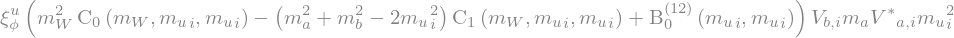

In [124]:
triangleGuiui = lfvhd.TriangleSFF(vertexϕuu(i),vertexudGu(i,b),vertexduGd(i,a),
                                  [mW,mu[i],mu[i]])
AL1 = (triangleGuiui.AL()/A).expand().collect(triangleGuiui.Cs).simplify().subs(cambios)
AL1

#### Divergent term

In [125]:
DivGuiuiL = AL1.subs(lfvhd.cambiosDivFin(mW,mu[i],mu[i])).expand(
).collect([lfvhd.Δe],evaluate=False)[lfvhd.Δe].simplify()*lfvhd.Δe
DivGuiuiL 

The **right** form factor is given by

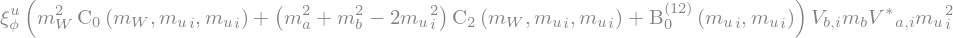

In [126]:
AR1 = (triangleGuiui.AR()/A).expand().collect([lfvhd.C2(mW,mu[i],mu[i])]).simplify(
).simplify().subs(cambios)
AR1

#### Divergent term

In [127]:
DivGuiuiR = AR1.subs(lfvhd.cambiosDivFin(mW,mu[i],mu[i])).expand(
).collect([lfvhd.Δe],evaluate=False)[lfvhd.Δe].simplify()*lfvhd.Δe
DivGuiuiR

### Triangle Wuiui

This is the diagram 2 of our reference 

In [128]:
triangleWuiui = lfvhd.TriangleVFF(vertexϕuu(i),vertexudWu(i,b),vertexduWd(i,a),
                                  [mW,mu[i],mu[i]])

**Left form factor**

In [129]:
AL2 = (triangleWuiui.AL().subs(lfvhd.D,4)/A).expand().subs(cambios).simplify()
AL2

**Right form factor**

In [130]:
AR2 = (triangleWuiui.AR().subs(lfvhd.D,4)/A).expand().subs(cambios).simplify()
AR2

### Triangle uiWW

This is the diagram 3 of our reference 

In [131]:
triangleuiWW = lfvhd.TriangleFVV(vertexϕWW,vertexudWu(i,b),vertexduWd(i,a),[mu[i],mW,mW])

**Left form factor**

In [132]:
AL3 = (triangleuiWW.AL().subs(lfvhd.D,4)/A).subs(cambios)
AL3

**Right form factor**

In [133]:
(triangleuiWW.AR().subs(lfvhd.D,4)/A).subs(cambios)

### Triangle uiWG

This is the diagram 4 of our reference

In [134]:
triangleuiWG = lfvhd.TriangleFVS(vertexϕWG,vertexudGu(i,b),vertexduWd(i,a),[mu[i],mW,mW])

**Left form factor**

In [135]:
AL4 = (triangleuiWG.AL()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mu[i],mW,mW),lfvhd.C1(mu[i],mW,mW),lfvhd.C2(mu[i],mW,mW)],simplify).simplify(
).subs(cambios)
AL4

**Right form factor**

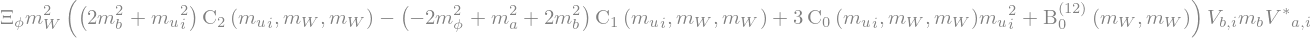

In [136]:
AR4 = (triangleuiWG.AR()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mu[i],mW,mW),lfvhd.C1(mu[i],mW,mW),lfvhd.C2(mu[i],mW,mW)],simplify).simplify(
).subs(cambios)
AR4

### Triangle uiGW

This is the diagram 5 of our reference

In [137]:
triangleuiGW = lfvhd.TriangleFSV(vertexϕGW,vertexudWu(i,b),vertexduGd(i,a),[mu[i],mW,mW])

**Left form factor**

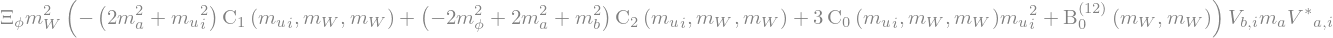

In [138]:
AL5 = (triangleuiGW.AL()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mu[i],mW,mW),lfvhd.C1(mu[i],mW,mW),lfvhd.C2(mu[i],mW,mW)],simplify).simplify(
).subs(cambios)
AL5

**Right form factor**

In [139]:
AR5 = (triangleuiGW.AR()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mu[i],mW,mW),lfvhd.C1(mu[i],mW,mW),lfvhd.C2(mu[i],mW,mW)],simplify).simplify(
).subs(cambios)
AR5

### Triangle uiGG

This is the diagram 6 of our reference

In [140]:
triangleuiGG = lfvhd.TriangleFSS(vertexϕGG,vertexudGu(i,b),vertexduGd(i,a),[mu[i],mW,mW])

**Left form factor**

In [141]:
AL6 = (triangleuiGG.AL()/A).expand().collect([mu[i]],simplify
                                      ).simplify().subs(cambios)
AL6

**Right form factor**

In [142]:
ALR6 = (triangleuiGG.AR()/A).expand().collect([mu[i]],simplify
                                  ).simplify().subs(cambios)
ALR6

### Bubble uiW

This is the diagram 7 of our reference 

In [143]:
bubbleuiW = lfvhd.BubbleFV(vertexϕdd(b),vertexudWu(i,b),vertexduWd(i,a),[mu[i],mW])

**Left form factor**

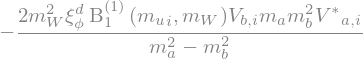

In [144]:
AL7 = (bubbleuiW.AL()/A).subs(lfvhd.D,4).subs(cambios)
AL7

**Right form factor**

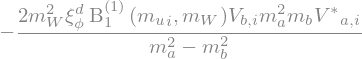

In [145]:
AR7 = (bubbleuiW.AR()/A).subs(lfvhd.D,4).subs(cambios)
AR7

### Bubble Wui

This is the diagram 9 of our reference 

In [146]:
bubbleWui = lfvhd.BubbleVF(vertexϕdd(a),vertexudWu(i,b),vertexduWd(i,a),[mu[i],mW])

**Left form factor**

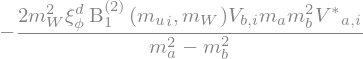

In [147]:
AL9 = (bubbleWui.AL()/A).subs(lfvhd.D,4).subs(cambios).simplify()
AL9

**Right form factor**

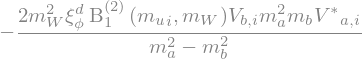

In [148]:
AR9 = (bubbleWui.AR()/A).subs(lfvhd.D,4).subs(cambios).simplify()
AR9

**Adding bubble niW y Wni**

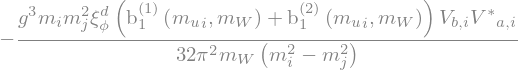

In [149]:
BuiW_L =  (bubbleuiW.AL() + bubbleWui.AL()).subs(lfvhd.D,4).simplify()
BuiW_L.subs(lfvhd.cambiosDivFin(mu[i],mW,mW))

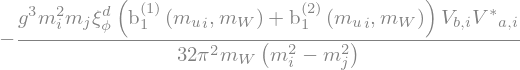

In [150]:
BuiW_R =  (bubbleuiW.AR() + bubbleWui.AR()).subs(lfvhd.D,4).simplify()
BuiW_R.subs(lfvhd.cambiosDivFin(mu[i],mW,mW))

### Bubble uiG

This is the diagram 8 of our reference

In [151]:
bubbleuiG = lfvhd.BubbleFS(vertexϕdd(b),vertexudGu(i,b),vertexduGd(i,a),[mu[i],mW])

**Left form factor**

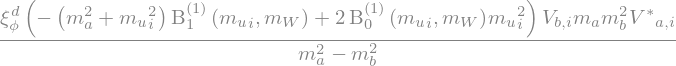

In [152]:
AL8 = (bubbleuiG.AL()/A).collect([
    lfvhd.B1_0(mu[i],mW),lfvhd.B1_1(mu[i],mW)]).simplify().subs(cambios)
AL8

**Right form factor**

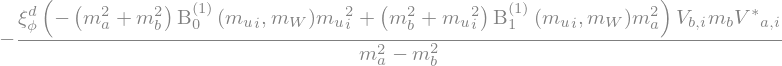

In [153]:
AR8 = (bubbleuiG.AR()/A).collect([
    lfvhd.B1_0(mu[i],mW),lfvhd.B1_1(mu[i],mW)]).simplify().subs(cambios)
AR8

### Bubble Gui

This is the diagram 10 of our reference

In [154]:
bubbleGui = lfvhd.BubbleSF(vertexϕdd(a),vertexudGu(i,b),vertexduGd(i,a),[mu[i],mW])

**Left form factor**

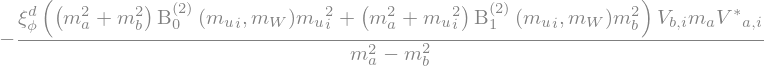

In [155]:
AL10 = (bubbleGui.AL()/A).collect([
      lfvhd.B2_0(mu[i],mW),lfvhd.B2_1(mu[i],mW)]).simplify().subs(cambios)
AL10

**Right form factor**

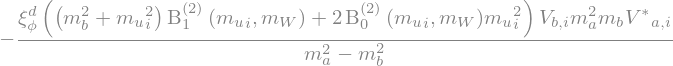

In [156]:
AR10 = (bubbleGui.AR()/A).collect([
    lfvhd.B2_0(mu[i],mW),lfvhd.B2_1(mu[i],mW)]).simplify().subs(cambios)
AR10

**Adding bubble niG y Gni**

In [157]:
DivuiGL = ((AL8 + AL10).subs(lfvhd.cambiosDivFin(mu[i],mW,mW)).expand(
).collect(lfvhd.Δe,evaluate=False)[lfvhd.Δe]*lfvhd.Δe).simplify()
DivuiGL

In [158]:
DivuiGR = ((AR8 + AR10).subs(lfvhd.cambiosDivFin(mu[i],mW,mW)).expand(
).collect(lfvhd.Δe,evaluate=False)[lfvhd.Δe]*lfvhd.Δe).simplify()
DivuiGR

# Diagrams mediated by W and H

## Triangle Huiui

This is a new diagram

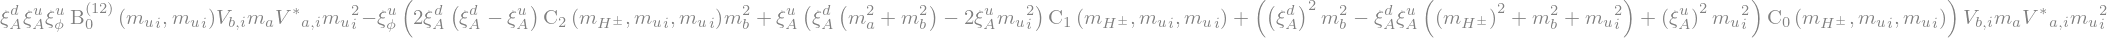

In [159]:
triangleHuiui = lfvhd.TriangleSFF(vertexϕuu(i),vertexudHu(i,b),vertexduHd(i,a),
                                  [mHpm,mu[i],mu[i]])
AL11 = (triangleHuiui.AL()/A).expand().collect(triangleHuiui.Cs).collect(
    [ξdA,ξuA],simplify).subs(cambios)
AL11

In [71]:
# mab = m[a]**2 + m[b]**2
# mij = mu[i]**2 + mu[j]**2
# mab_ij = m[a]**2*mu[j]**2 + m[b]**2*mu[i]**2
# Xbj = mHpm**2 + m[b]**2 + mu[j]**2
# Xai = mHpm**2 + m[a]**2 + mu[i]**2
# Yaij = mHpm**2*mu[i]**2 + m[a]**2*mu[j]**2 + mu[i]**2*mu[j]**2
# Ybij = mHpm**2*mu[j]**2 + m[b]**2*mu[i]**2 + mu[i]**2*mu[j]**2
# mabs, mijs, mab_ijs, Xbjs, Xais, Yaijs, Ybijs = symbols('m_{ab}, m_{ij}, {{m^{ab}_{ij}}}, X_{bj}, X_{ai}, Y_{aij}, Y_{bij} ',real = True)

# cambiosmXY = {mab:mabs, mij:mijs, mab_ij:mab_ijs,
#              Xbj:Xbjs, Xai:Xais, Yaij:Yaijs, Ybij:Ybijs}
# AL11.subs(cambiosmXY)

In [72]:
# AL11body = AL11.args#[2]
# AL11body

In [75]:
# PVHninj = [lfvhd.B12_0(mn[i],mn[j]), lfvhd.C0(mHpm,mn[i],mn[j]),
#           lfvhd.C1(mHpm,mn[i],mn[j]), lfvhd.C2(mHpm,mn[i],mn[j])]

# AL11coeff_Cij = AL11body.args[0].args[0]
# AL11coeff_Cij.collect(PVHninj,evaluate=False)#.simplify()


In [76]:
# AL11coeff_Cijmnimnj = AL11body.args[1].args[0]
# AL11coeff_Cijmnimnj.collect(PVHninj,evaluate=False)

**Termino divergente**

In [160]:
DivHuiuiL = AL11.subs(
    lfvhd.cambiosDivFin(mHpm,mu[i],mu[i])).expand(
).collect([lfvhd.Δe],evaluate=False)[lfvhd.Δe].simplify()*lfvhd.Δe
DivHuiuiL

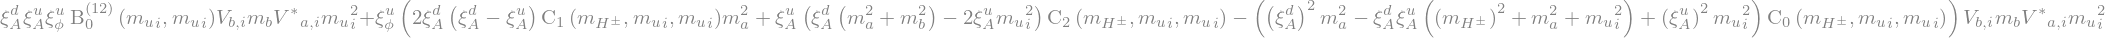

In [161]:
AR11 = (triangleHuiui.AR()/A).expand().collect(triangleHuiui.Cs
                                            ).collect([ξdA,ξuA],simplify).subs(cambios)
AR11

In [80]:
# AR11body = AR11.args[1]
# AR11body 

In [81]:
# AR11coeff_Cij = AR11body.args[0].args[0]
# AR11coeff_Cij.collect(PVHninj,evaluate=False)

In [82]:
# AR11coeff_Cijmnimnj = AR11body.args[1].args[0]
# AR11coeff_Cijmnimnj.collect(PVHninj,evaluate=False)

In [162]:
DivHuiuiR = AR11.subs(lfvhd.cambiosDivFin(mHpm,mu[i],mu[i])).expand(
).collect([lfvhd.Δe],evaluate=False)[lfvhd.Δe].simplify()*lfvhd.Δe
DivHuiuiR

## Triangle uiWH

In [163]:
triangleuiWH = lfvhd.TriangleFVS(vertexϕWH,vertexudHu(i,b),vertexduWd(i,a),[mu[i],mW,mHpm])

In [164]:
AL12 = (triangleuiWH.AL()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mu[i],mW,mHpm),lfvhd.C1(mu[i],mW,mHpm),lfvhd.C2(mu[i],mW,mHpm)],simplify).simplify(
).subs(cambios)
AL12#AL12.args[0].func,AL12.args[2].func

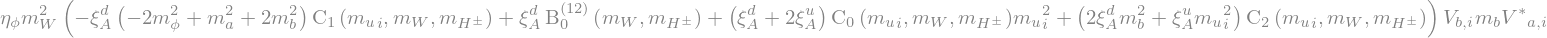

In [165]:
AR12 = (triangleuiWH.AR()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mu[i],mW,mHpm),lfvhd.C1(mu[i],mW,mHpm),lfvhd.C2(mu[i],mW,mHpm)],simplify).simplify(
).subs(cambios)
AR12

## Triangle uiHW

In [166]:
triangleuiHW = lfvhd.TriangleFSV(vertexϕHW,vertexudWu(i,b),vertexduHd(i,a),[mu[i],mHpm,mW])

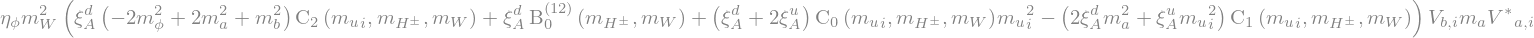

In [167]:
AL13 = (triangleuiHW.AL()/A).subs(lfvhd.D,4).expand().collect(
    triangleuiHW.Cs,simplify).simplify().subs(cambios)
AL13

In [168]:
AR13 = (triangleuiHW.AR()/A).subs(lfvhd.D,4).expand().collect(
    triangleuiHW.Cs,simplify).simplify(
).subs(cambios)
AR13

## Triangle uiGH

In [169]:
triangleuiGH = lfvhd.TriangleFSS(vertexϕHG,vertexudHu(i,b),vertexduGd(i,a),[mu[i],mW,mHpm])

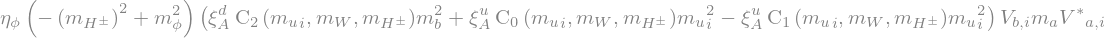

In [170]:
AL14 = (triangleuiGH.AL()/A).expand().collect(triangleuiGH.Cs,simplify
                                      ).simplify().subs(cambios)
AL14

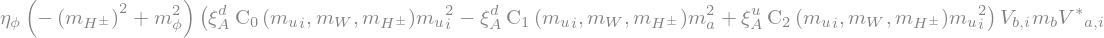

In [171]:
AR14 = (triangleuiGH.AR()/A).expand().collect(triangleuiGH.Cs,simplify
                                      ).simplify().subs(cambios)
AR14

## Triangle uiHG

In [172]:
triangleuiHG = lfvhd.TriangleFSS(vertexϕHG,vertexudGu(i,b),vertexduHd(i,a),[mu[i],mHpm,mW])

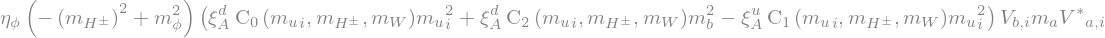

In [173]:
AL15 = (triangleuiHG.AL()/A).expand().collect(triangleuiHG.Cs,simplify
                                      ).simplify().subs(cambios)
AL15

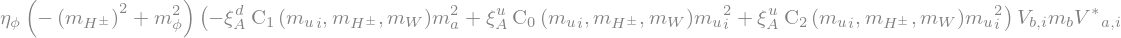

In [174]:
AR15 = (triangleuiHG.AR()/A).expand().collect(triangleuiHG.Cs,simplify
                                      ).simplify().subs(cambios)
AR15

## Triangle uiHH
This is a new diagram 

In [175]:
triangleuiHH = lfvhd.TriangleFSS(vertexϕHH,vertexudHu(i,b),vertexduHd(i,a),[mu[i],mHpm,mHpm])

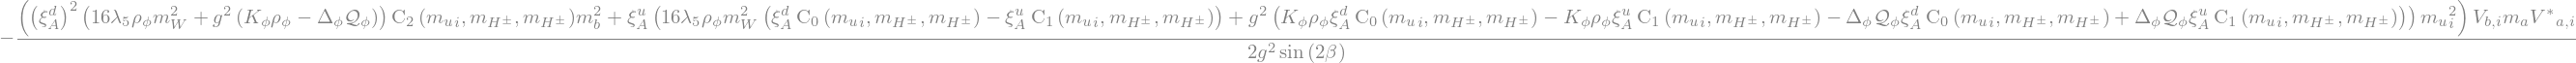

In [176]:
AL16 = (triangleuiHH.AL()/A).expand().collect([mu[i]],simplify
                                      ).simplify().subs(cambios)
AL16

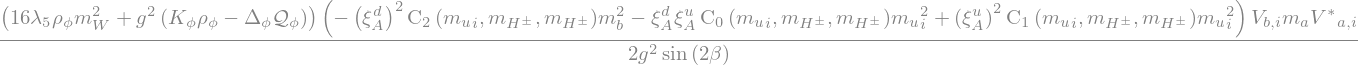

In [177]:
AL16.expand().collect(triangleuiHH.Cs,simplify).simplify()

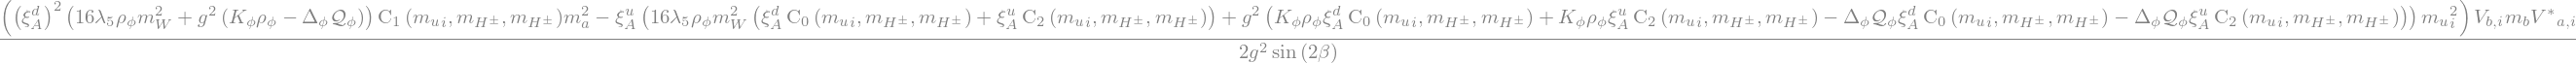

In [178]:
AR16 = (triangleuiHH.AR()/A).expand().collect([mu[i]],simplify
                                      ).simplify().subs(cambios)
AR16

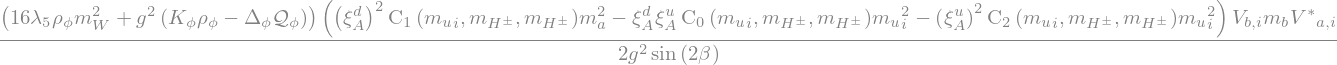

In [179]:
AR16.expand().collect(triangleuiHH.Cs,simplify).simplify()

### Bubble niH

In [180]:
bubbleuiH = lfvhd.BubbleFS(vertexϕdd(b),vertexudHu(i,b),vertexduHd(i,a),[mu[i],mHpm])

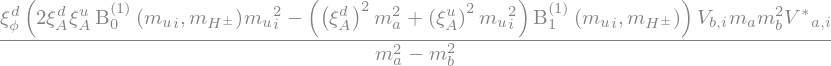

In [181]:
AL17 = (bubbleuiH.AL()/A).collect([
    lfvhd.B1_0(mu[i],mHpm),lfvhd.B1_1(mu[i],mHpm)]).simplify().subs(cambios)
AL17

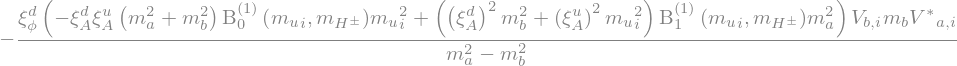

In [182]:
AR17 = (bubbleuiH.AR()/A).collect([
    lfvhd.B1_0(mu[i],mHpm),lfvhd.B1_1(mu[i],mHpm)]).simplify().subs(cambios)
AR17

## Triangle Hni

In [183]:
bubbleHui = lfvhd.BubbleSF(vertexϕdd(a),vertexudHu(i,b),vertexduHd(i,a),[mu[i],mHpm])

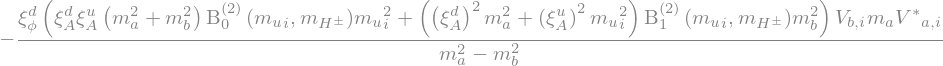

In [184]:
AL18 = (bubbleHui.AL()/A).collect([
    lfvhd.B2_0(mu[i],mHpm),lfvhd.B2_1(mu[i],mHpm)]).simplify().subs(cambios)
AL18

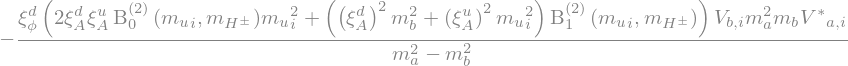

In [185]:
AR18 = (bubbleHui.AR()/A).collect([
    lfvhd.B2_0(mu[i],mHpm),lfvhd.B2_1(mu[i],mHpm)]).simplify().subs(cambios)
AR18

**Adding bubbles uiH and Hui**

In [186]:
DivuiHL = ((AL17 + AL18).subs(lfvhd.cambiosDivFin(mu[i],mHpm,mHpm)).expand(
).collect(lfvhd.Δe,evaluate=False)[lfvhd.Δe]*lfvhd.Δe).simplify()
DivuiHL

In [187]:
DivuiHR = ((AR17 + AR18).subs(lfvhd.cambiosDivFin(mu[i],mHpm,mHpm)).expand(
).collect(lfvhd.Δe,evaluate=False)[lfvhd.Δe]*lfvhd.Δe).simplify()
DivuiHR

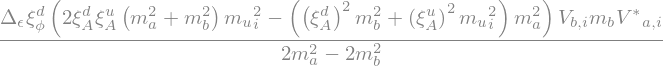

In [188]:
divAR17 = (AR17.subs(lfvhd.cambiosDivFin(mu[i],mHpm,mHpm)).expand(
).collect(lfvhd.Δe,evaluate=False)[lfvhd.Δe]*lfvhd.Δe).simplify()
divAR17

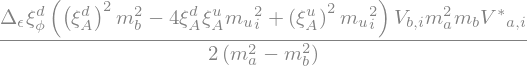

In [189]:
divAR18 = (AR18.subs(lfvhd.cambiosDivFin(mu[i],mHpm,mHpm)).expand(
).collect(lfvhd.Δe,evaluate=False)[lfvhd.Δe]*lfvhd.Δe).simplify()
divAR18

In [190]:
(divAR17 + divAR18).simplify()

In [191]:
DivHuiuiR

## Working on divergencies

In [207]:
typeI_ξh = {ξdφ:cos(α)/sin(β),ξuφ:cos(α)/sin(β),ξdA:-cot(β),ξuA:cot(β)}
typeI_ξH = {ξdφ:sin(α)/sin(β),ξuφ:sin(α)/sin(β),ξdA:-cot(β),ξuA:cot(β)}

typeII_ξh = {ξdφ:-sin(α)/cos(β),ξuφ:cos(α)/sin(β),ξdA:tan(β),ξuA:cot(β)}
typeII_ξH = {ξdφ:cos(α)/cos(β),ξuφ:sin(α)/sin(β),ξdA:tan(β),ξuA:cot(β)}

lepton_ξh = {ξdφ:cos(α)/cos(β),ξuφ:cos(α)/cos(β),ξdA:-cot(β),ξuA:cot(β)}
lepton_ξH = {ξdφ:sin(α)/sin(β),ξuφ:sin(α)/sin(β),ξdA:-cot(β),ξuA:cot(β)}

flipped_ξh = {ξdφ:-sin(α)/cos(β),ξuφ:cos(α)/cos(β),ξdA:tan(β),ξuA:cot(β)}
flipped_ξH = {ξdφ:cos(α)/cos(β),ξuφ:sin(α)/sin(β),ξdA:tan(β),ξuA:cot(β)}

In [193]:
DivGR = (DivGuiuiR + DivuiGR).simplify()
DivGL = (DivGuiuiL + DivuiGL).simplify()
DivGR,DivGL

In [194]:
DivHR = (DivHuiuiR + DivuiHR).simplify()
DivHL = (DivHuiuiL + DivuiHL).simplify()
DivHR,DivHL

In the type I 2HDM we have

In [195]:
DivGR.subs(typeI_ξh).simplify(), DivHR.subs(typeI_ξh).simplify()

In [196]:
DivGL.subs(typeI_ξh).simplify(), DivHL.subs(typeI_ξh).simplify()

In [197]:
DivGR.subs(typeI_ξH).simplify(), DivHR.subs(typeI_ξH).simplify()

In [198]:
DivGL.subs(typeI_ξH).simplify(), DivHL.subs(typeI_ξH).simplify()

In the type II 2HDM we have

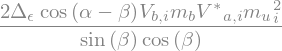

In [199]:
(DivGR.subs(typeII_ξh).simplify() + DivHR.subs(typeII_ξh).simplify()).simplify()

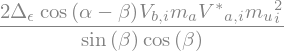

In [200]:
(DivGL.subs(typeII_ξh).simplify() + DivHL.subs(typeII_ξh).simplify()).simplify()

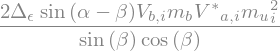

In [201]:
(DivGR.subs(typeII_ξH).simplify() + DivHR.subs(typeII_ξH).simplify()).simplify()

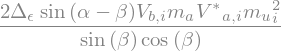

In [202]:
(DivGL.subs(typeII_ξH).simplify() + DivHL.subs(typeII_ξH).simplify()).simplify()

In the lepton-specific mode

In [208]:
(DivGR.subs(lepton_ξh).simplify() + DivHR.subs(lepton_ξh).simplify()).simplify()

In [209]:
(DivGL.subs(lepton_ξh).simplify() + DivHL.subs(lepton_ξh).simplify()).simplify()

In [210]:
(DivGR.subs(lepton_ξH).simplify() + DivHR.subs(lepton_ξH).simplify()).simplify()

In [211]:
(DivGL.subs(lepton_ξH).simplify() + DivHL.subs(lepton_ξH).simplify()).simplify()

In the flipped model

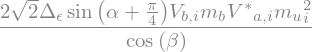

In [212]:
(DivGR.subs(flipped_ξh).simplify() + DivHR.subs(flipped_ξh).simplify()).simplify()

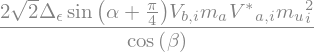

In [213]:
(DivGL.subs(flipped_ξh).simplify() + DivHL.subs(flipped_ξh).simplify()).simplify()

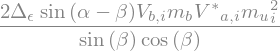

In [214]:
(DivGR.subs(flipped_ξH).simplify() + DivHR.subs(flipped_ξH).simplify()).simplify()

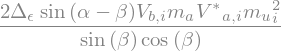

In [215]:
(DivGL.subs(flipped_ξH).simplify() + DivHL.subs(flipped_ξH).simplify()).simplify()

### Total divergencie

In [216]:
DivTotR = (DivGR + DivHR).simplify()
DivTotL = (DivGL + DivHL).simplify()
DivTotR, DivTotL

In [221]:
DivTotL.subs(typeI_ξh)

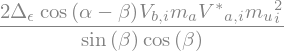

In [222]:
DivTotL.subs(typeII_ξh).simplify()

In [223]:
DivTotL.subs(lepton_ξh).simplify()

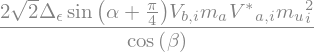

In [224]:
DivTotL.subs(flipped_ξh).simplify()